# 01 - Explore Raw Data
Inspect UJIIndoorLoc raw CSV distributions and missing RSSI patterns.

In [1]:
import sys
from pathlib import Path

root = Path.cwd().parent   # notebooks → project root
sys.path.append(str(root))

# Raw content

### Loading data and snapshot

In [5]:
# 01_explore_raw_data.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data.load_raw import load_training_data, load_validation_data

train_df = load_training_data()
val_df = load_validation_data()

print("Training shape:", train_df.shape)
print("Validation shape:", val_df.shape)

train_df.head()

Training shape: (19937, 529)
Validation shape: (1111, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


### Building/Floor Distribution

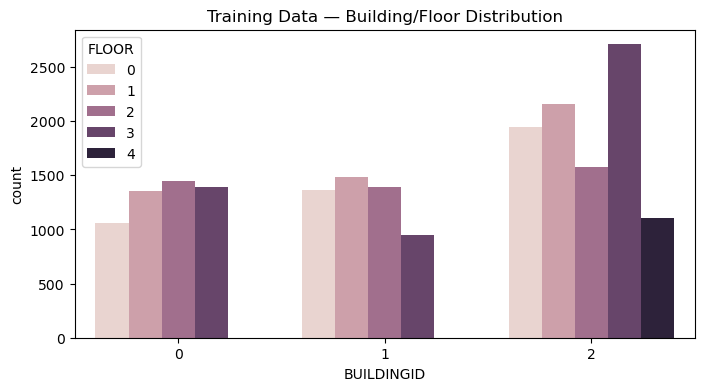

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_df, x="BUILDINGID", hue="FLOOR")
plt.title("Training Data — Building/Floor Distribution")
plt.show()

### Lat/Lon Scatter

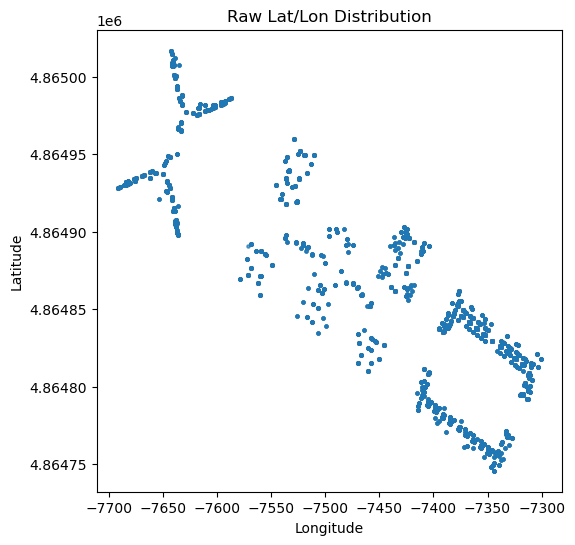

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(train_df["LONGITUDE"], train_df["LATITUDE"], s=5, alpha=0.3)
plt.title("Raw Lat/Lon Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### AP Visibility Histogram

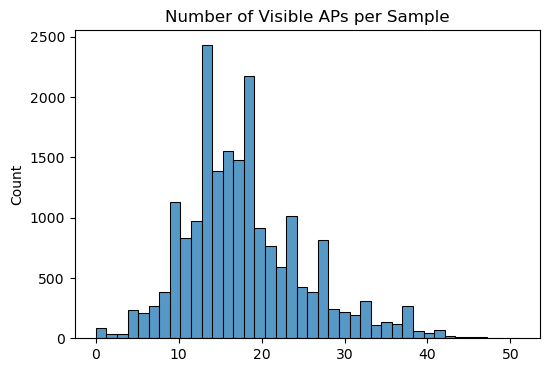

In [8]:
ap_cols = [c for c in train_df.columns if "WAP" in c]

visible_counts = (train_df[ap_cols] != 100).sum(axis=1)

plt.figure(figsize=(6,4))
sns.histplot(visible_counts, bins=40)
plt.title("Number of Visible APs per Sample")
plt.show()

# Cleaned content 

In [1]:
import sys
print(sys.executable)

c:\Users\etiab\miniconda3\envs\loc\python.exe


In [2]:
import pyarrow
pyarrow.__version__

'21.0.0'

### Data Snapshot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

clean_train = pd.read_parquet("data/interim/clean/train_clean.parquet")
clean_val = pd.read_parquet("data/interim/clean/val_clean.parquet")

clean_train.head()

,building,floor,space_id,x,y,aps
0,1,2,106,5.329429e+06,4.056977e+06,"[{'ap_id': 'WAP090', 'rssi': -67.0}, {'ap_id':..."
1,1,2,106,4.858856e+06,5.552215e+06,"[{'ap_id': 'WAP090', 'rssi': -46.0}, {'ap_id':..."
2,1,2,103,3.088409e+06,7.254276e+06,"[{'ap_id': 'WAP090', 'rssi': -66.0}, {'ap_id':..."
3,1,2,102,3.637518e+06,5.537515e+06,"[{'ap_id': 'WAP035', 'rssi': -92.0}, {'ap_id':..."
4,0,0,122,1.051302e+05,2.739581e+06,[]


### Plot Metric Coordinates per Building

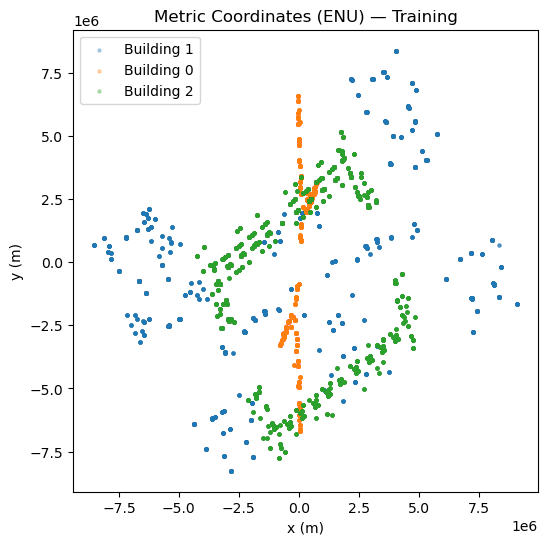

In [4]:
plt.figure(figsize=(6,6))
for b in clean_train["building"].unique():
    sub = clean_train[clean_train["building"] == b]
    plt.scatter(sub["x"], sub["y"], s=5, alpha=0.3, label=f"Building {b}")

plt.legend()
plt.title("Metric Coordinates (ENU) — Training")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

### Inspect AP‑wise Fingerprint Example

In [5]:
sample = clean_train.iloc[0]
sample["aps"][:10]  # show first 10 APs

array([{'ap_id': 'WAP090', 'rssi': -67.0},
       {'ap_id': 'WAP091', 'rssi': -68.0},
       {'ap_id': 'WAP103', 'rssi': -68.0},
       {'ap_id': 'WAP104', 'rssi': -68.0},
       {'ap_id': 'WAP105', 'rssi': -78.0},
       {'ap_id': 'WAP106', 'rssi': -79.0},
       {'ap_id': 'WAP125', 'rssi': -92.0},
       {'ap_id': 'WAP126', 'rssi': -95.0},
       {'ap_id': 'WAP166', 'rssi': -91.0},
       {'ap_id': 'WAP167', 'rssi': -89.0}], dtype=object)

### Visible AP Count After Cleaning

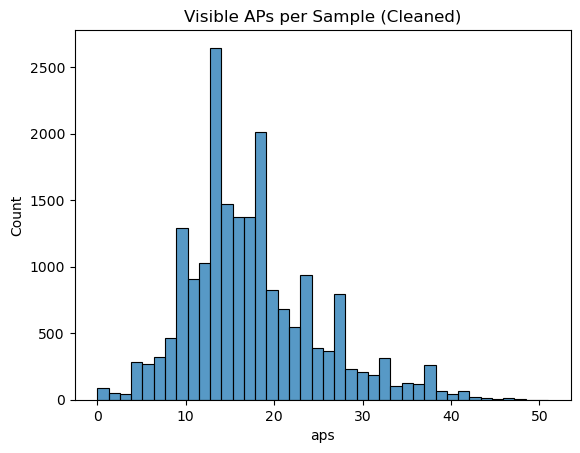

In [6]:
visible_counts = clean_train["aps"].apply(len)

sns.histplot(visible_counts, bins=40)
plt.title("Visible APs per Sample (Cleaned)")
plt.show()